## <font color='purple'>Malignant or Benign classification </font> <br>
Supervised Machine Learning Lab<br>
Lab Assignment 05 part 2 : K-Nearest Neighbor
### <font color='blue'>Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 </font>
 

### <font color='teal'>Importing Libraries </font>

In [1]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff

### <font color='teal'>Upload Dataset </font>

In [2]:
#Reading the data
df = pd.read_csv("/content/bdiag.csv")

In [3]:
#Printing the first 5 rows of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### <font color='teal'>Data Description </font>

In [4]:
#Giving the data a brief look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#describe the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### <font color='teal'> Data Cleaning </font>

In [6]:
#checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#printing the number of values of B and M in diagnosis column
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### <font color='teal'> Plotting graphs </font>

In [8]:
#plotting the histogram for diagnosis column
fig = px.histogram(df, x='diagnosis',
                   title='Diagnosis of Breast Cancer')
fig.update_layout(width = 500, height = 400)# Set the gap between bars
fig.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

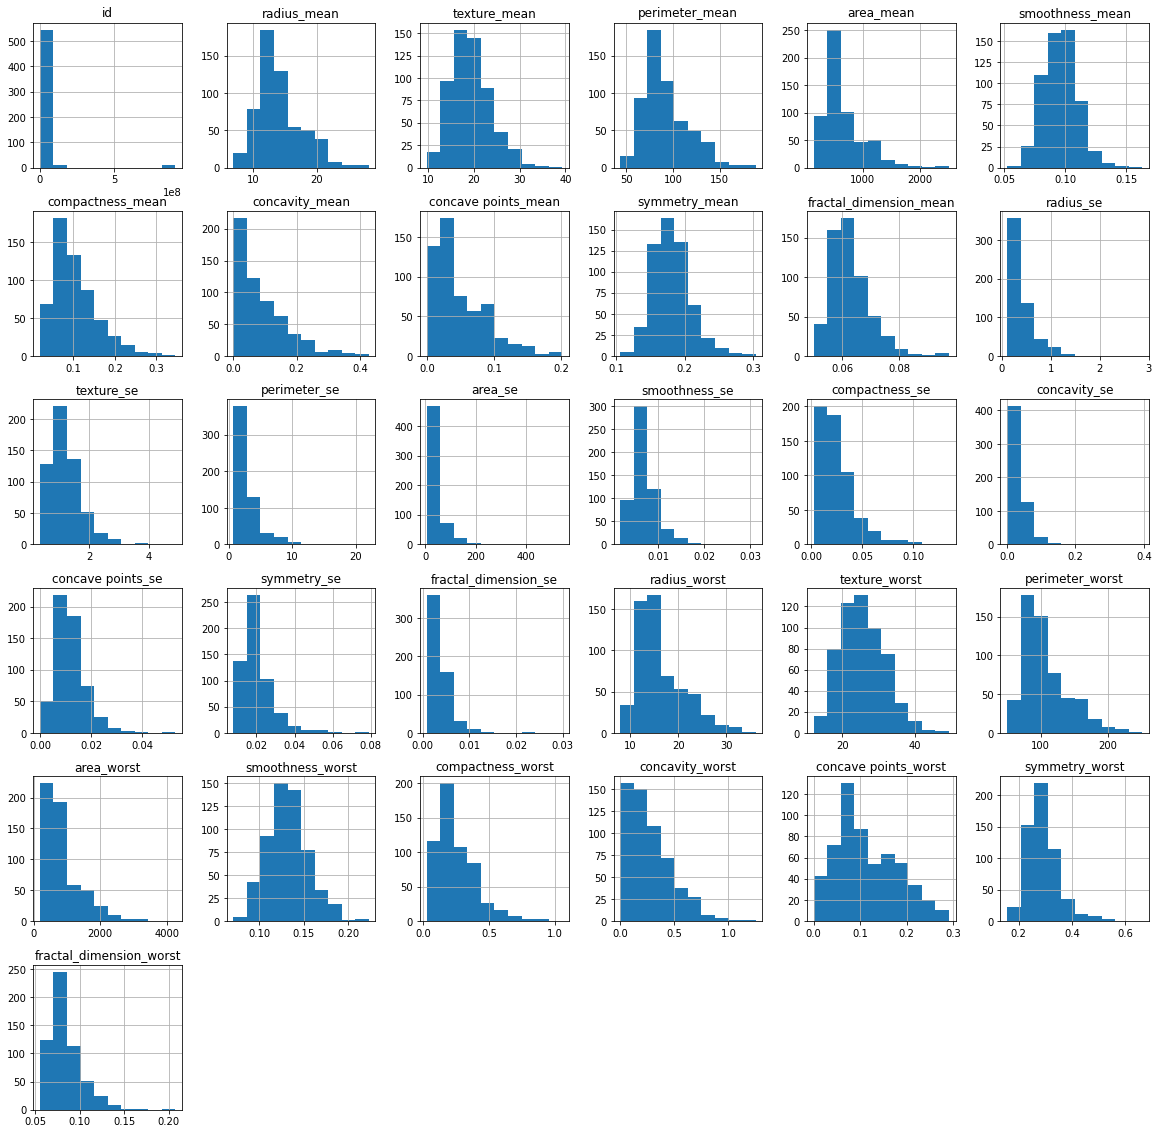

In [9]:
#plotting the histogram for all the columns
df.hist(figsize=(20,20))

### <font color='teal'>Correlation matrix </font>

In [10]:
#Correlation matrix
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [11]:
#Dropping the id column
df.drop(['id'],axis=1,inplace=True)

In [12]:
#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

### <font color='teal'> Splitting the datainto x and y  </font>

In [13]:
#Defining X as texture mean and radius mean and y as diagnosis
X = df[['texture_mean','radius_mean']]
y = df['diagnosis']

### <font color='teal'> Data Scaling  </font>

In [14]:
#Scaling the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### <font color='teal'> Data Splitting into train test </font>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color='teal'> Data Accuracies for k = 5  </font>

In [16]:
#Finding the accurracy for k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("KNN Classification Report: ", classification_report(y_test, y_pred))


KNN Accuracy:  0.9035087719298246
KNN Confusion Matrix:  [[66  5]
 [ 6 37]]
KNN Classification Report:                precision    recall  f1-score   support

           B       0.92      0.93      0.92        71
           M       0.88      0.86      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### <font color='teal'> Graph when k = 5 </font>

In [40]:
import plotly.express as px

fig = px.scatter(df, x='texture_mean', y='radius_mean', color='diagnosis',
                 title='Breast Cancer Diagnosis')

# Update marker symbols and size
fig.update_traces(marker=dict(size=8, symbol='circle'))

# Update color scale
fig.update_traces(marker=dict(colorscale='Viridis'))

# Add axis titles
fig.update_layout(
    xaxis_title="Texture Mean",
    yaxis_title="Radius Mean",
)

# Update legend title
fig.update_layout(
    legend=dict(title="Diagnosis")
)

# Update font size
fig.update_layout(
    font=dict(size=12)
)

# Set the gap between bars
fig.update_layout(
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.update_layout(
    xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    width=1200,
    height=500
)

fig.show()


### <font color='teal'> Data Accuracies for k = `15  </font>

In [18]:
#The best K value is for k= 15 hence finding the accuracy for k=15
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)
y_pred = knn_15.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("KNN Classification Report: ", classification_report(y_test, y_pred))

KNN Accuracy:  0.9210526315789473
KNN Confusion Matrix:  [[67  4]
 [ 5 38]]
KNN Classification Report:                precision    recall  f1-score   support

           B       0.93      0.94      0.94        71
           M       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



### <font color='teal'> Graph when k = 15 </font>

In [27]:
import plotly.express as px

fig = px.scatter(df, x='texture_mean', y='radius_mean', color='diagnosis',
                 title='Breast Cancer Diagnosis', color_discrete_sequence=['#EF553B', '#00CC96'])

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='gray')))
fig.update_layout(width=1200, height=600, font=dict(size=16),
                  margin=dict(l=50, r=50, b=50, t=80),
                  xaxis=dict(title='Texture Mean', linecolor='black', linewidth=2, mirror=True),
                  yaxis=dict(title='Radius Mean', linecolor='black', linewidth=2, mirror=True),
                  legend=dict(title='Diagnosis', title_font=dict(size=18),
                              font=dict(size=14)))

fig.show()
